In [1]:
import os
import copy
import functools
from collections import defaultdict

import lmfit
import corner
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from scipy.stats import linregress
from matplotlib.ticker import MultipleLocator
from lmfit import Parameter, Parameters 

import sivqed.models.fitter as fitter
from sivqed.models.cavity import Cavity, MultiQubitCavity
from sivqed.models.fitter import cavity_ref_model, single_siv_ref_model, mcmc
from sivqed.models.diffusion import diffused_siv_peaks, plot_diffused_contrasts

np.set_printoptions(precision=4)
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = [8, 5]

In [2]:
siv_path = "../data/20210812_diosBL_bb02_SiV/"

# List of 2-tuples, first is the avg file (which contains the freq values), second is the scans file
siv_files = [["sweeper_fwd_avg_11_03_14.txt", "sweeper_fwd_scans_11_03_14.txt"],  
             ["sweeper_fwd_avg_11_12_32.txt", "sweeper_fwd_scans_11_12_32.txt"],
             ["sweeper_fwd_avg_11_30_01.txt", "sweeper_fwd_scans_11_30_01.txt"],
             ["sweeper_fwd_avg_11_52_56.txt", "sweeper_fwd_scans_11_52_56.txt"]
            ]

# Plot data

## Plot SiV Data

Loaded file ../data/20210812_diosBL_bb02_SiV/sweeper_fwd_avg_11_03_14.txt!
Loaded file ../data/20210812_diosBL_bb02_SiV/sweeper_fwd_avg_11_12_32.txt!
Loaded file ../data/20210812_diosBL_bb02_SiV/sweeper_fwd_avg_11_30_01.txt!
Loaded file ../data/20210812_diosBL_bb02_SiV/sweeper_fwd_avg_11_52_56.txt!


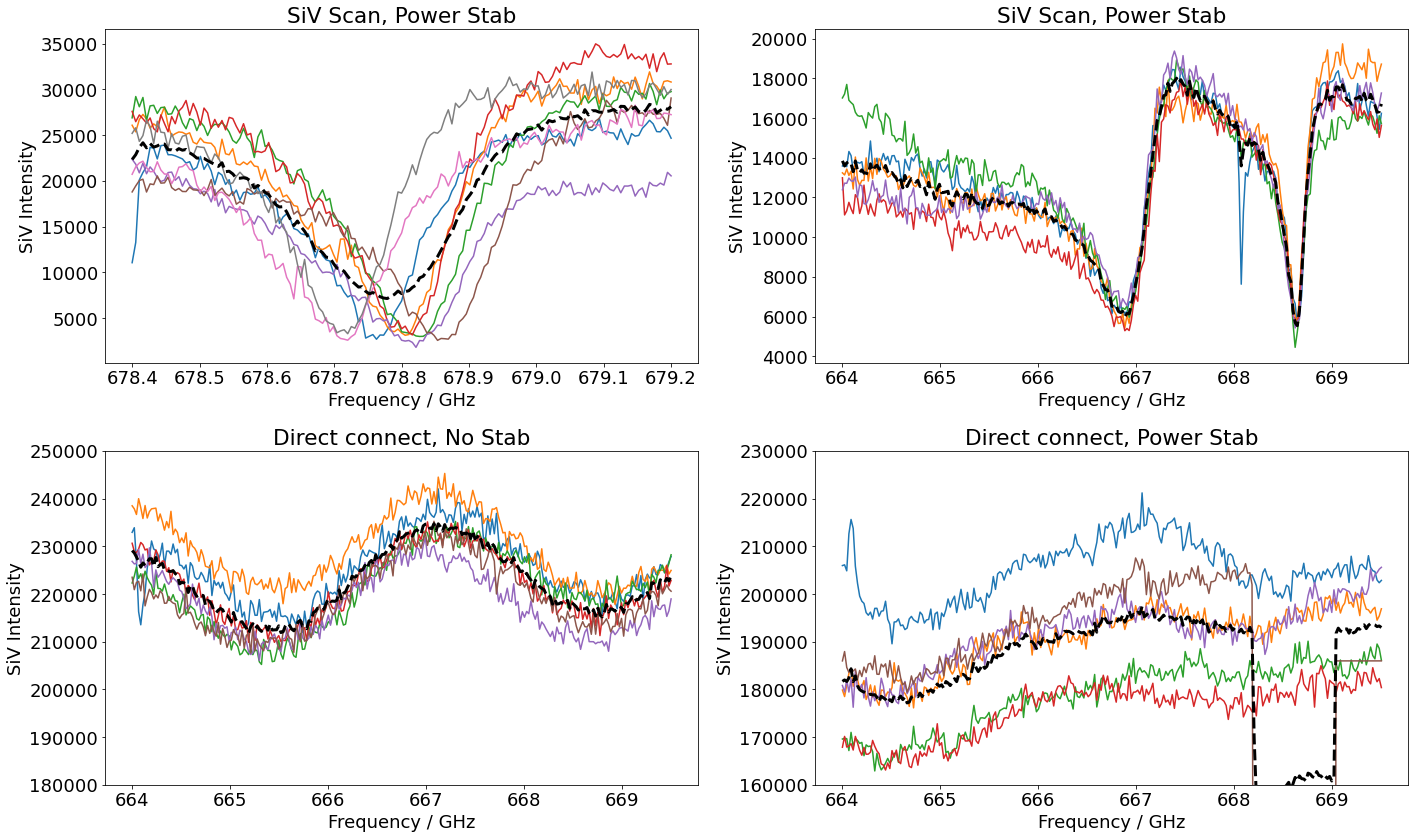

In [8]:
siv_avg_scans = []

ncols = 2
nrows = int(np.ceil(len(siv_files) / ncols))
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=[20, 6*nrows])
# Reshape a 1D array of subplots into 2D for consistent indenxing
if ax.ndim == 1: ax = ax.reshape(-1, ax.size)

for idx, siv_files_tuple in enumerate(siv_files):
    # Extract freq from the avg scan file
    siv_freqs, _ = np.loadtxt(siv_path + siv_files_tuple[0])
    print(f"Loaded file {siv_path + siv_files_tuple[0]}!")
    
    siv_freqs = 1000 * (siv_freqs - 406) # Convert to GHz

    # Extract data from the SiV scan file
    siv_data = np.loadtxt(siv_path + siv_files_tuple[1])

    # Plot each scan from the file
    for siv_series in siv_data:
        ax[idx//ncols, idx%ncols].plot(siv_freqs, siv_series)
    
    # Plot the average scans
    siv_avg_scans.append(np.mean(siv_data, axis=0))
    ax[idx//ncols, idx%ncols].plot(siv_freqs, np.mean(siv_data, axis=0), 'k--', lw=3)

    axes = ax[idx//ncols, idx%ncols]
    axes.set_xlabel("Frequency / GHz")
    axes.set_ylabel("SiV Intensity")

ax[0, 0].set_title("SiV Scan, Power Stab")
ax[0, 1].set_title("SiV Scan, Power Stab")
ax[1, 0].set_title("Direct connect, No Stab")
ax[1, 1].set_title("Direct connect, Power Stab")
    
ax[1, 0].set_ylim(180000, 250000)
ax[1, 1].set_ylim(160000, 230000)
fig.tight_layout()

Loaded file ../data/20210812_diosBL_bb02_SiV/sweeper_fwd_avg_11_03_14.txt!
Loaded file ../data/20210812_diosBL_bb02_SiV/sweeper_fwd_avg_11_12_32.txt!
Loaded file ../data/20210812_diosBL_bb02_SiV/sweeper_fwd_avg_11_30_01.txt!
Loaded file ../data/20210812_diosBL_bb02_SiV/sweeper_fwd_avg_11_52_56.txt!


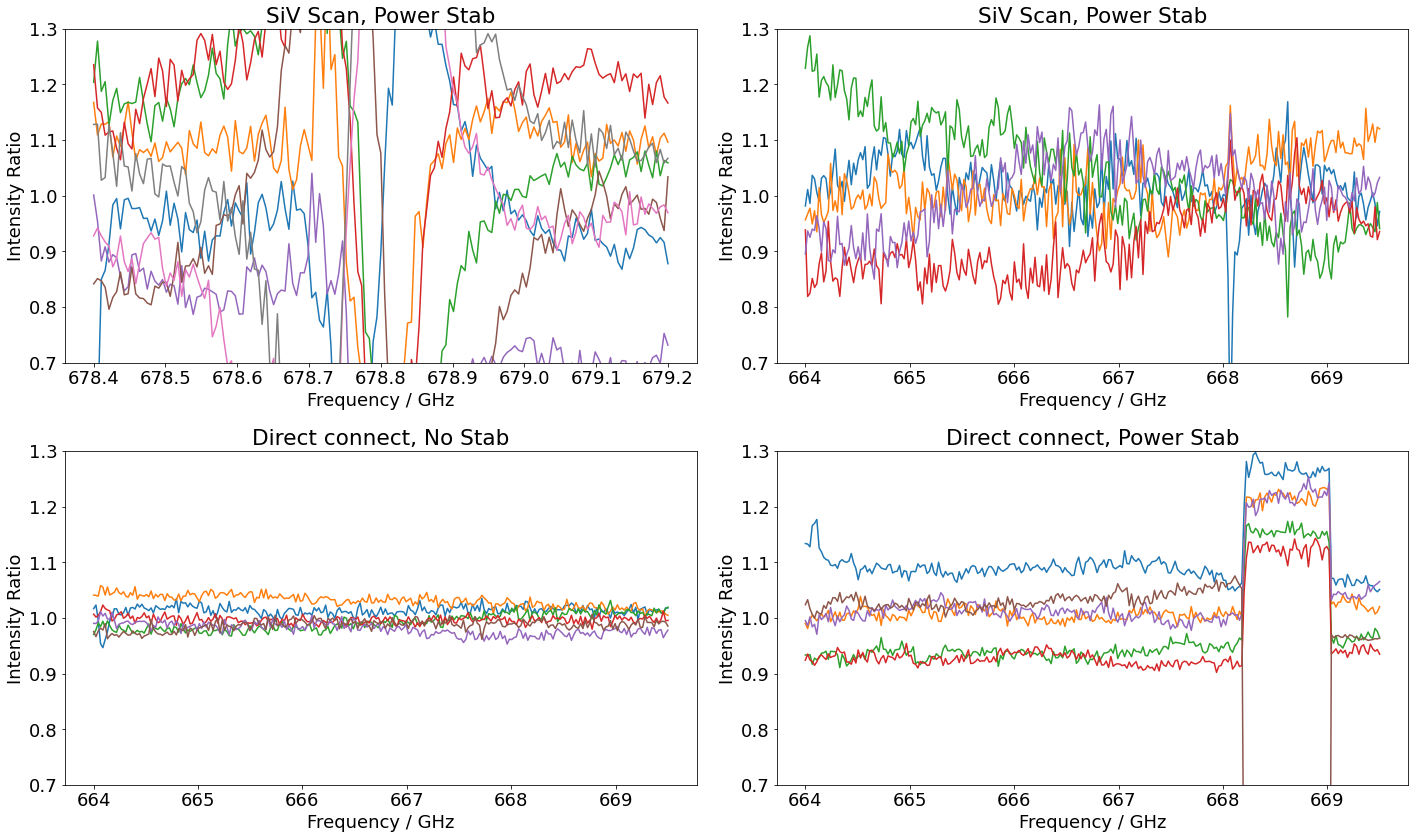

In [12]:
ncols = 2
nrows = int(np.ceil(len(siv_files) / ncols))
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=[20, 6*nrows])
# Reshape a 1D array of subplots into 2D for consistent indenxing
if ax.ndim == 1: ax = ax.reshape(-1, ax.size)

for idx, siv_files_tuple in enumerate(siv_files):
    # Extract freq from the avg scan file
    siv_freqs, _ = np.loadtxt(siv_path + siv_files_tuple[0])
    print(f"Loaded file {siv_path + siv_files_tuple[0]}!")
    
    siv_freqs = 1000 * (siv_freqs - 406) # Convert to GHz

    # Extract data from the SiV scan file
    siv_data = np.loadtxt(siv_path + siv_files_tuple[1])

    # Plot each scan from the file
    for siv_series in siv_data:
        ax[idx//ncols, idx%ncols].plot(siv_freqs, siv_series / np.mean(siv_data, axis=0))
    

    axes = ax[idx//ncols, idx%ncols]
    axes.set_xlabel("Frequency / GHz")
    axes.set_ylabel("Intensity Ratio")
    axes.set_ylim(0.7, 1.3)
     
ax[0, 0].set_title("SiV Scan, Power Stab")
ax[0, 1].set_title("SiV Scan, Power Stab")
ax[1, 0].set_title("Direct connect, No Stab")
ax[1, 1].set_title("Direct connect, Power Stab")
fig.tight_layout()